In [2]:
import plotly.graph_objects as go
import networkx as nx
import or_gym
import matplotlib.pyplot as plt
import numpy as np


plt.rcParams['figure.dpi'] = 256
plt.rcParams['text.usetex'] = True
plt.rcParams['font.size'] = 20


def plot_network(env):
    colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
    colors = ['royalblue']*len(colors)
    adjacency_matrix = np.vstack(env.graph.edges())
    # Set level colors
    level_col = {'retailer': 0,
                'distributor': 1,
                'manufacturer': 2,
                'raw_materials': 3}

    max_density = np.max([len(v) for v in env.levels.values()])
    node_coords = {}
    node_num = 1
    plt.figure(figsize=(8, 3))

    for i, (level, nodes) in enumerate(env.levels.items()):
        n = len(nodes)
        node_y = max_density / 2 if n == 1 else np.linspace(0, max_density, n)
        node_y = np.atleast_1d(node_y)
        plt.scatter(np.repeat(i, n), node_y, label=level, s=100, color='red')
        for y in node_y:
            plt.annotate(r'$N_{}$'.format(node_num), xy=(i, y+0.05))
            node_coords[node_num] = (i, y)
            node_num += 1

    # Draw edges
    for node_num, v in node_coords.items():
        x, y = v
        sinks = adjacency_matrix[np.where(adjacency_matrix[:, 0]==node_num)][:, 1]
        for s in sinks:
            try:
                sink_coord = node_coords[s]
            except KeyError:
                continue
            for k, n in env.levels.items():
                if node_num in n:
                    color = colors[level_col[k]]
            x_ = np.hstack([x, sink_coord[0]])
            y_ = np.hstack([y, sink_coord[1]])
            plt.plot(x_, y_, color=color)

    plt.ylabel('Node')
    plt.yticks([0], [''])
    plt.xlabel('Level')
    plt.xticks(np.arange(len(env.levels)), [k for k in env.levels.keys()])
    plt.show()


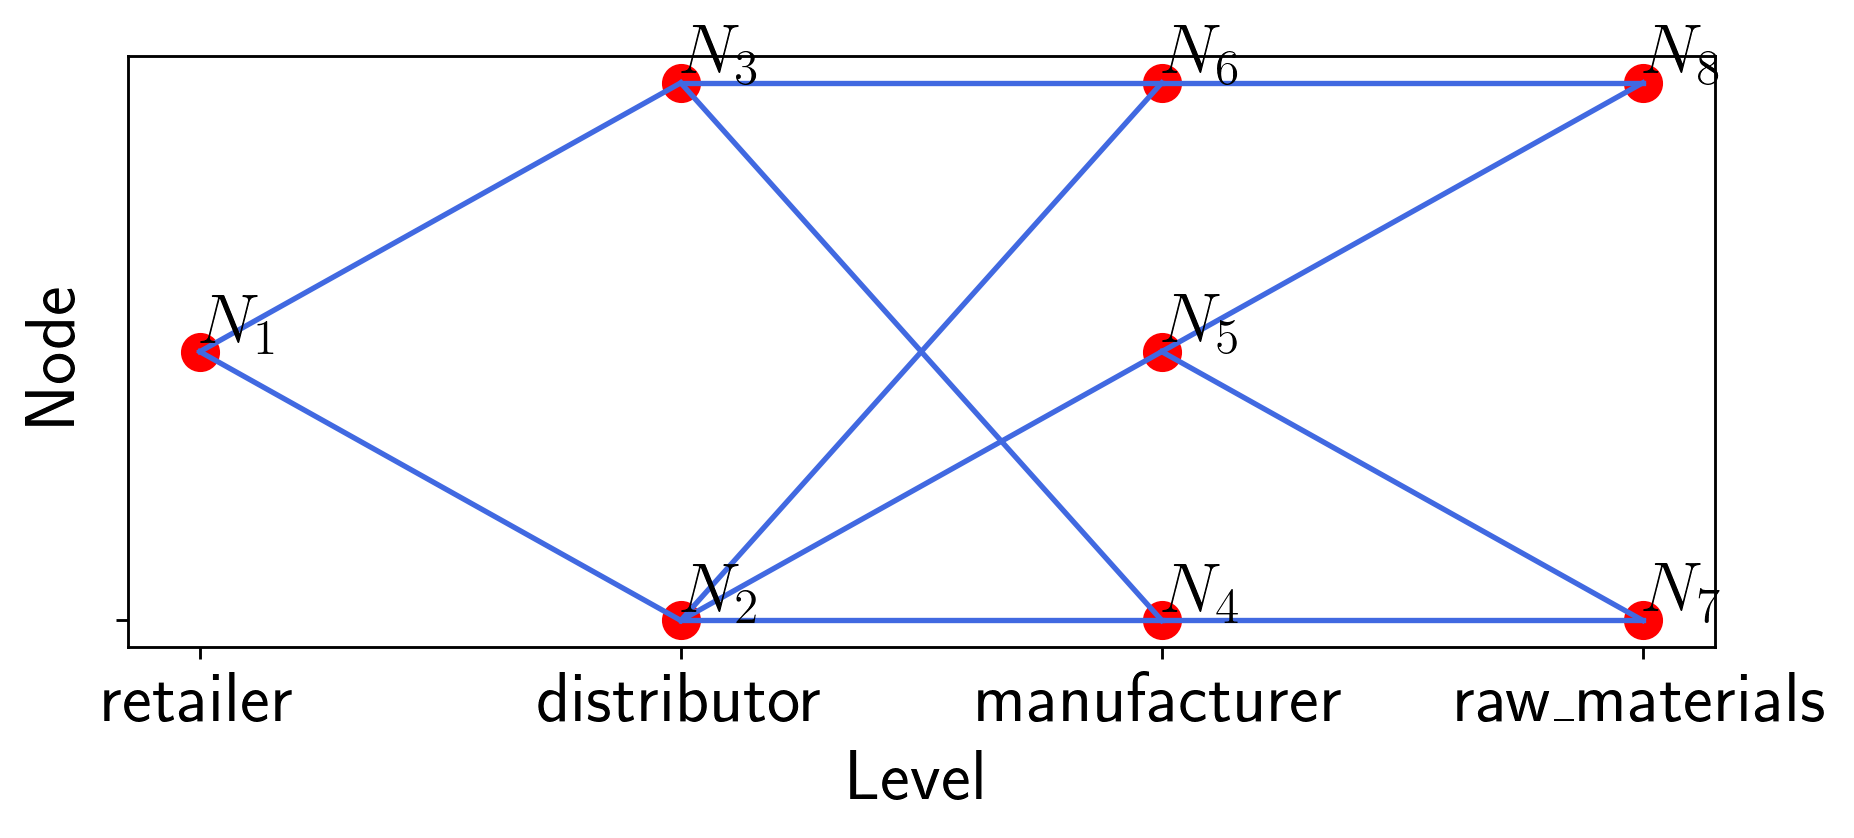

In [3]:
env = or_gym.make('NetworkManagement-v1')

plot_network(env)